# Helper Graphing Code

In [1]:
import os
import json
import numpy as np

directory = "dataset_results_deepseek_chat"  #change to model jsonl result path as needed

context_sizes = [500, 1000, 2000, 4000, 8000, 16000] 
depth_percentages = [0, 25, 50, 75, 100]  

grouped_accuracies = {(context, depth): [] for context in context_sizes for depth in depth_percentages}

# parse files
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".jsonl"):
        with open(os.path.join(directory, filename), "r") as file:
            for line in file:
                data = json.loads(line)
                # extract the context size, depth percentage, and accuracy
                context = data.get("context_length")
                depth = data.get("depth_percentage")
                accuracy = data.get("accuracy")
                
                # broup the accuracy by context size and depth percentage
                if context in context_sizes and depth in depth_percentages and accuracy is not None:
                    grouped_accuracies[(context, depth)].append(accuracy)

# calculate averages for each (context size, depth percentage) combination
averaged_accuracies = np.zeros((len(depth_percentages), len(context_sizes))) 

for i, depth in enumerate(depth_percentages):
    for j, context in enumerate(context_sizes):
        accuracies = grouped_accuracies[(context, depth)]
        if accuracies:
            averaged_accuracies[i, j] = sum(accuracies) / len(accuracies)

# print accuracy matrix
print("Averaged Accuracy Array (Depth x Context):")
print(averaged_accuracies)

print("Formatted Array:")
for row in averaged_accuracies:
    print([round(val, 2) for val in row])


Averaged Accuracy Array (Depth x Context):
[[70.     40.833  39.543  40.9375 40.478  41.1545]
 [42.5    37.857  37.501  39.1175 39.543  40.3705]
 [31.6645 35.625  36.538  38.0555 39.348  40.0005]
 [30.     33.887  37.143  38.1595 38.3335 39.483 ]
 [37.     35.5    39.334  39.75   39.4    40.667 ]]
Formatted Array:
[70.0, 40.83, 39.54, 40.94, 40.48, 41.15]
[42.5, 37.86, 37.5, 39.12, 39.54, 40.37]
[31.66, 35.62, 36.54, 38.06, 39.35, 40.0]
[30.0, 33.89, 37.14, 38.16, 38.33, 39.48]
[37.0, 35.5, 39.33, 39.75, 39.4, 40.67]


In [2]:
all_results = [gpt_4o_result, gpt_o1_result, deepseek_chat_result, deepseek_r1_result]
model_names = ["GPT-4o", "GPT-o1", "Deepseek Chat", "Deepseek R1"]

In [3]:
import statistics

context_sizes = ['500', '1k', '2k', '4k', '8k', '16k']

total = 0
result_num = 0

for i, result in enumerate(all_results):
    print(f"{model_names[i]} Results:")
    avg_results = []
    for j in range(len(result[0])):
        total += result[0][j] + result[1][j] + result[2][j] + result[3][j] + result[4][j]
        result_num += 5
        avg_per_ctx_len = (result[0][j] + result[1][j] + result[2][j] + result[3][j] + result[4][j]) / 5
        avg_results.append(avg_per_ctx_len)
        print(f"Context Length {context_sizes[j]}: {avg_per_ctx_len:.0f}")
    # Calculate and print the standard deviation for the current model
    std_dev = statistics.pstdev(avg_results)
    print(f"Standard Deviation between context lengths: {std_dev:.1f}")
    print()

print(f"Average Accuracy: {total / result_num:.1f}")

GPT-4o Results:
Context Length 500: 82
Context Length 1k: 91
Context Length 2k: 79
Context Length 4k: 84
Context Length 8k: 78
Context Length 16k: 74
Standard Deviation between context lengths: 5.5

GPT-4o Mini Results:
Context Length 500: 86
Context Length 1k: 82
Context Length 2k: 81
Context Length 4k: 79
Context Length 8k: 73
Context Length 16k: 66
Standard Deviation between context lengths: 6.7

GPT-4-Turbo Results:
Context Length 500: 86
Context Length 1k: 82
Context Length 2k: 78
Context Length 4k: 74
Context Length 8k: 70
Context Length 16k: 66
Standard Deviation between context lengths: 6.7

Claude 3.5 Sonnet Results:
Context Length 500: 84
Context Length 1k: 84
Context Length 2k: 79
Context Length 4k: 72
Context Length 8k: 61
Context Length 16k: 46
Standard Deviation between context lengths: 13.9

Claude 3 Opus Results:
Context Length 500: 84
Context Length 1k: 73
Context Length 2k: 67
Context Length 4k: 50
Context Length 8k: 23
Context Length 16k: 18
Standard Deviation betwee

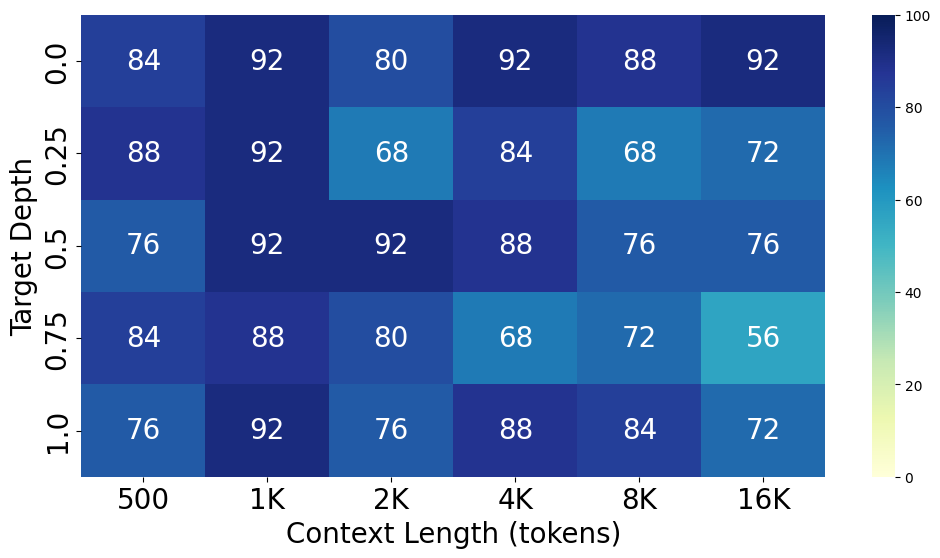

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(gpt_4o_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

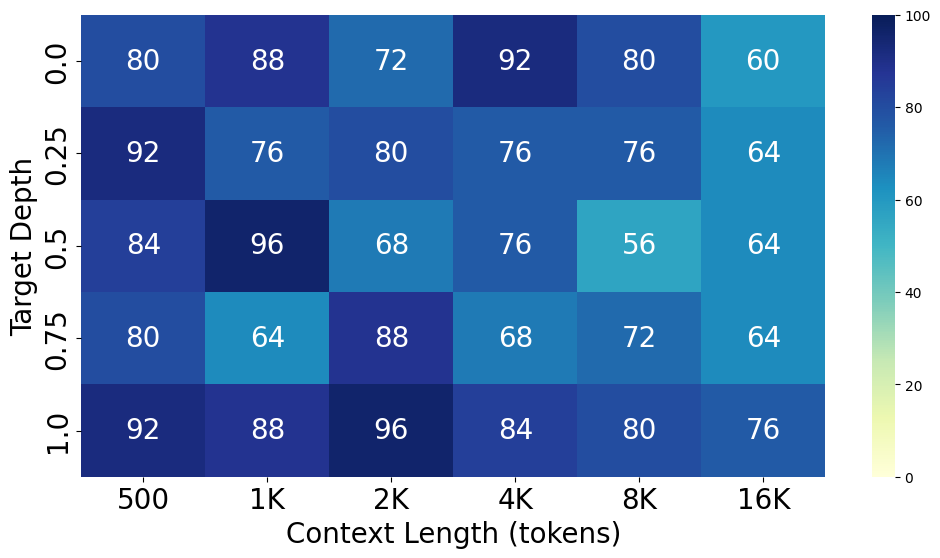

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(gpt_4o_mini_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

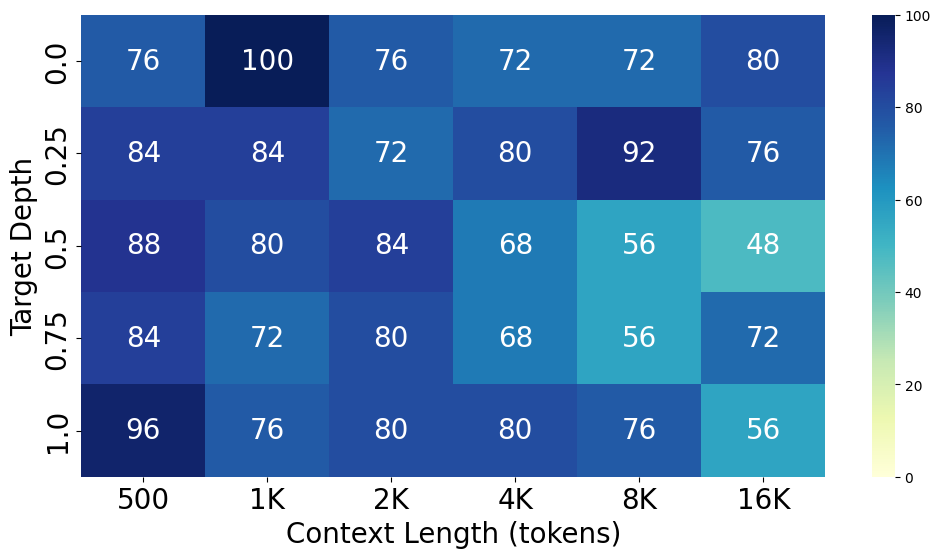

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(deepseek_chat_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

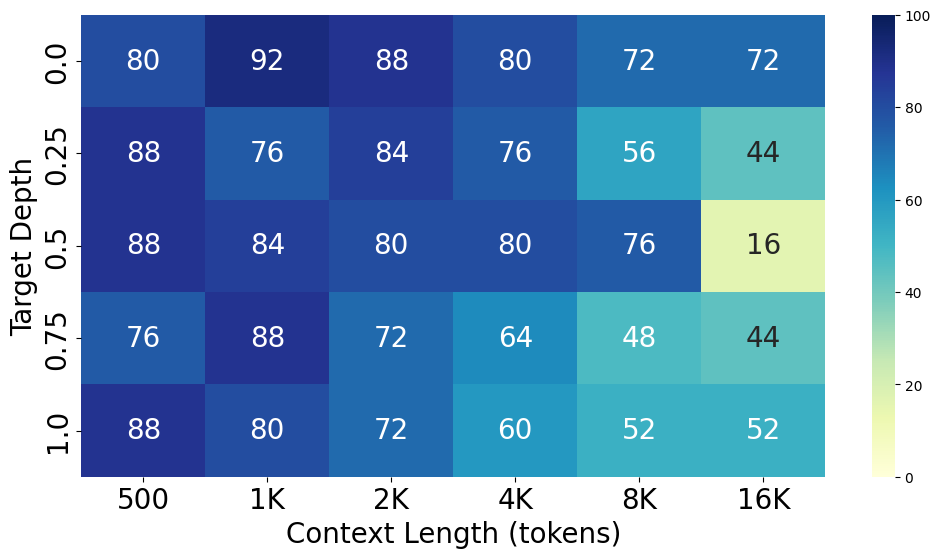

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(deepseek_r1_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

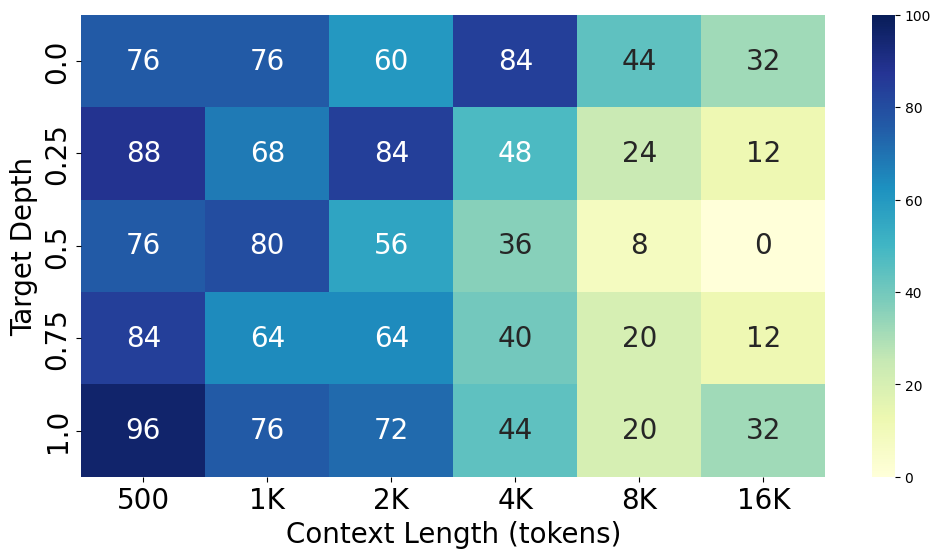

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(claude_3_opus_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()